# BANK APP REVIEWS - CBE

In [68]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [69]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [70]:
warnings.filterwarnings("ignore")

In [71]:
# variable
BANK="CBE"

In [72]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [73]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/CBE_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (500, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,fce00cda-d71a-486e-a4c2-7479ab7793bc,Abdurahiman Abubaker Hussein,https://play-lh.googleusercontent.com/a/ACg8oc...,best app of finance,5,0,NaN,2025-06-04 07:38:54,NaN,NaN
1,f543a13e-bc0f-4348-b57f-3a83eb67206c,Milky Yebassa,https://play-lh.googleusercontent.com/a/ACg8oc...,yetemeta,1,0,5.1.0,2025-06-03 21:04:44,NaN,NaN
2,2470d199-834a-4134-a0f9-8c684ba75491,ENGIDA KEBEDE,https://play-lh.googleusercontent.com/a-/ALV-U...,Engida Kebede Fetera,5,0,5.1.0,2025-06-03 20:20:23,NaN,NaN
3,4beee0dd-05ad-474c-bdff-0146723f2179,Abel Beyena,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.1.0,2025-06-03 11:32:52,NaN,NaN
4,428e5117-387f-4c9d-b095-3230e3f83a8a,Senayt Weldeslase,https://play-lh.googleusercontent.com/a/ACg8oc...,it is not safety,1,0,5.1.0,2025-06-03 09:14:31,NaN,NaN


### Dataset Overview

In [74]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
278,832328c2-cdd0-465b-b6eb-e519f7ffa59d,Elias Zufan,https://play-lh.googleusercontent.com/a-/ALV-U...,it doesn't work,1,0,5.1.0,2025-05-21 20:39:04,NaN,NaN
418,43135ccc-5195-43a0-b7a1-c446368d8046,Daniel Dere Deffecho,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice!,5,0,NaN,2025-05-30 11:55:13,NaN,NaN
359,fb3a4e37-bf12-44d3-842f-06994277596e,Dereje Messelle,https://play-lh.googleusercontent.com/a-/ALV-U...,አዛ,1,0,NaN,2025-05-04 17:41:19,NaN,NaN
498,9eff9bee-1e05-4f68-ae9a-2de67b8564bc,Daniel Abera,https://play-lh.googleusercontent.com/a/ACg8oc...,it is reliable and easy to use.,5,0,5.1.0,2025-05-20 17:50:21,NaN,NaN
146,6e27f7ac-d2f5-456f-b269-1082a276c3d7,Abesalom Milion,https://play-lh.googleusercontent.com/a/ACg8oc...,i miss the old one i couldn't send my mony to ...,1,0,5.1.0,2025-05-06 13:34:08,NaN,NaN
434,e24202d3-c8fd-46f3-9919-a6946c6ac403,Safiyya Husein,https://play-lh.googleusercontent.com/a/ACg8oc...,Ronaldo 🇵🇹 🥇,5,0,5.1.0,2025-05-25 12:56:24,NaN,NaN
306,2fe903d9-41fe-4ec3-9a2d-fd0acfe57725,Tsigereda Tadesse,https://play-lh.googleusercontent.com/a/ACg8oc...,well satisfied with this beautiful app,5,0,5.1.0,2025-05-18 11:11:52,NaN,NaN
47,46c30714-0201-4098-a5a5-b4c94924181d,Yitagesu Haile,https://play-lh.googleusercontent.com/a-/ALV-U...,excellent,5,0,5.1.0,2025-05-24 04:51:52,NaN,NaN
15,66bc4eed-2004-41ea-89cd-5bed26921bc1,Gemechu Kedir,https://play-lh.googleusercontent.com/a/ACg8oc...,"it,s good app and time manager 👍",5,0,5.1.0,2025-05-30 19:13:36,NaN,NaN
59,3589e146-296a-4c7c-9c8d-8f1593190cbe,Abu Waritu,https://play-lh.googleusercontent.com/a-/ALV-U...,how to I get my money,5,0,5.1.0,2025-05-23 01:43:04,NaN,NaN


In [75]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
495,26fd7f14-c17f-4081-8910-45f2008ca145,Ephrem Berhanu,https://play-lh.googleusercontent.com/a/ACg8oc...,the screenshot and the reffresh options are so...,2,0,NaN,2025-05-21 07:02:44,NaN,NaN
496,b22fe51f-e673-41ae-a625-2f8f1cce76ee,Samuel Solomon,https://play-lh.googleusercontent.com/a-/ALV-U...,poor service,1,0,5.1.0,2025-05-21 00:22:33,NaN,NaN
497,724eed5b-dd3a-47c2-865c-b6b63437c650,Kal Eldu,https://play-lh.googleusercontent.com/a/ACg8oc...,amazing,5,0,5.1.0,2025-05-20 19:28:06,NaN,NaN
498,9eff9bee-1e05-4f68-ae9a-2de67b8564bc,Daniel Abera,https://play-lh.googleusercontent.com/a/ACg8oc...,it is reliable and easy to use.,5,0,5.1.0,2025-05-20 17:50:21,NaN,NaN
499,cdad77fa-fadb-494d-970c-d816e2f6a83d,Yeabfana Berhanu,https://play-lh.googleusercontent.com/a/ACg8oc...,the most annoying mobile banking app I've ever...,1,0,5.1.0,2025-05-20 17:21:51,NaN,NaN


In [76]:
#shape of the dataset
df.shape

(500, 10)

In [77]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [78]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,500.0,4.072,1.543886,1.0,4.0,5.0,5.0,5.0
thumbsUpCount,500.0,0.336,2.174525,0.0,0.0,0.0,0.0,26.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,500,201,fce00cda-d71a-486e-a4c2-7479ab7793bc,3
userName,500,201,Abdurahiman Abubaker Hussein,3
userImage,500,201,https://play-lh.googleusercontent.com/a/ACg8oc...,3
content,500,165,good,33
reviewCreatedVersion,391,4,5.1.0,381
at,500,201,2025-06-04 07:38:54,3


In [80]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              500 non-null    object 
 1   userName              500 non-null    object 
 2   userImage             500 non-null    object 
 3   content               500 non-null    object 
 4   score                 500 non-null    int64  
 5   thumbsUpCount         500 non-null    int64  
 6   reviewCreatedVersion  391 non-null    object 
 7   at                    500 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [81]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                201
userName                201
userImage               201
at                      201
content                 165
thumbsUpCount             7
score                     5
reviewCreatedVersion      4
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [82]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [83]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,109,21.80%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [84]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,109,21.80%


### Duplicates

In [85]:
#count duplicates
dq.count_duplicates()

298

In [86]:
#look at the duplicates
dq.display_duplicates().sample(10)

[INFO] Found 298 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
462,d3187592-0b15-407a-a9a0-bffbd13bc2fd,Solomon Umako,https://play-lh.googleusercontent.com/a-/ALV-U...,very busy I don't know why... I prefer 889,3,0,5.1.0,2025-05-22 19:55:41,NaN,NaN
336,a41ead51-812c-49bc-bd00-d7fc843231f5,Michael Endashaw,https://play-lh.googleusercontent.com/a-/ALV-U...,why the app telling me to turn of developer op...,1,0,5.1.0,2025-05-07 19:54:08,NaN,NaN
294,26fd7f14-c17f-4081-8910-45f2008ca145,Ephrem Berhanu,https://play-lh.googleusercontent.com/a/ACg8oc...,the screenshot and the reffresh options are so...,2,0,NaN,2025-05-21 07:02:44,NaN,NaN
360,ed713db5-3620-4a87-bb2e-f242e03a9336,Tamrat Admasu,https://play-lh.googleusercontent.com/a/ACg8oc...,wow simple life,5,0,NaN,2025-05-04 06:07:03,NaN,NaN
380,28e615dd-6a83-4cbe-b483-ad5aa59dffbc,Sami Mesho,https://play-lh.googleusercontent.com/a-/ALV-U...,its good and simple to use,5,0,5.1.0,2025-05-02 15:47:48,NaN,NaN
452,5cf0ff9b-047d-4575-9351-eb77dee85e05,Ahmedhussen endris,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,5.1.0,2025-05-23 20:01:01,NaN,NaN
412,0c9b996b-a42e-4500-84fa-1d5eb764f490,Abdusalam Mohamad,https://play-lh.googleusercontent.com/a/ACg8oc...,Masha alla,5,0,5.1.0,2025-05-31 14:37:05,NaN,NaN
451,382b6807-a1f4-48e7-98fe-d22eeb1edd4d,Kira G (K),https://play-lh.googleusercontent.com/a/ACg8oc...,I like it,4,0,5.1.0,2025-05-23 20:14:08,NaN,NaN
228,ab728a43-6a39-41aa-a872-3e2a6154dc5a,Mahamadrauf Mahamadrauf,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,NaN,2025-05-25 19:44:05,NaN,NaN
482,4ba8ffe0-42c2-409c-a00b-8c784ed2b1e9,abush nesha,https://play-lh.googleusercontent.com/a/ACg8oc...,ok,5,0,5.1.0,2025-05-21 19:41:31,NaN,NaN


### Invalid Values

In [87]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [88]:
#saving the original dataset for later use
df_original=df.copy()

In [89]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 298 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
36,9e6b8e08-8acf-4e1f-a179-a5a703ff2ebc,Olyad Dagnie,https://play-lh.googleusercontent.com/a-/ALV-U...,The CBE app has been highly unreliable in rece...,2,11,5.1.0,2025-05-25 10:54:25,NaN,NaN
171,dec03b11-6fb0-4d3a-bb0e-83155b9a337c,Seydie Mebrie,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,5.1.0,2025-05-02 20:46:24,NaN,NaN
31,311eda41-1f0d-412f-a35c-09eae912fcdb,Sadiik Abdo,https://play-lh.googleusercontent.com/a/ACg8oc...,best,5,0,5.1.0,2025-05-25 17:34:23,NaN,NaN
142,847cdb9b-6873-4269-a45b-5ec548a715d2,Yordanos Abi,https://play-lh.googleusercontent.com/a/ACg8oc...,good,3,0,5.1.0,2025-05-06 17:38:42,NaN,NaN
48,fd822304-f04e-4be9-a1e0-c6ab0dd5d485,Fahed Aman,https://play-lh.googleusercontent.com/a-/ALV-U...,ok,1,0,5.1.0,2025-05-24 01:33:28,NaN,NaN


In [90]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [91]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
144,684fd27d-fb21-4f26-a3a2-2df5c05d35b8,Shafi Kedir,https://play-lh.googleusercontent.com/a/ACg8oc...,All service of Mobile Banking,5,0,NaN,2025-05-06 15:35:31,NaN,NaN
49,7663c1c2-6a74-4566-9e5d-c4451449d9d0,Mikiyas Mereke,https://play-lh.googleusercontent.com/a-/ALV-U...,Fantastic,5,0,5.1.0,2025-05-23 23:51:45,NaN,NaN
148,2aac8e73-fe95-4be3-a195-bdaa3a856d23,የኛ ቲዩብ,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,NaN,2025-05-06 13:28:47,NaN,NaN
161,ed713db5-3620-4a87-bb2e-f242e03a9336,Tamrat Admasu,https://play-lh.googleusercontent.com/a/ACg8oc...,wow simple life,5,0,NaN,2025-05-04 06:07:03,NaN,NaN
104,c32663ff-736c-49fc-9f18-b413f4aa4826,Esraafil Jemal,https://play-lh.googleusercontent.com/a-/ALV-U...,nice app,5,0,5.1.0,2025-05-19 02:11:17,NaN,NaN


In [92]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [93]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [94]:
dq.find_invalid_values()

{}

In [95]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [96]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=NICE+bank "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=da&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=better+service "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=best+app "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=cy&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good+app "HTTP/2 200 OK"
INFO:httpx:HTTP Reque

In [97]:
df.shape

(202, 5)

### Inconsistencies and Inaccuracies

In [98]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [99]:
df=dq.convert_columns_to_datetime()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 411
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       202 non-null    object
 1   content        202 non-null    object
 2   score          202 non-null    int64 
 3   thumbsUpCount  202 non-null    int64 
 4   at             202 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.5+ KB


In [101]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [102]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [103]:
df["bank"] = BANK  # add bank name column

In [104]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank
7,"It's a problem solver application, go ahead CB...",5,2025-06-02 10:40:18,Haileselassie tesfahunegn,0,CBE
187,It crashes frequently,4,2025-04-30 07:14:38,Tefera Tekle,0,CBE
103,Best app I loved it,5,2025-05-19 02:30:18,Abdi Salih,0,CBE
81,"This app is good, and we are using it well",1,2025-05-21 19:43:36,Bonsa Muzemil,0,CBE
138,Good,5,2025-05-07 17:11:00,Tadeos Mekonen,0,CBE
65,Hashi Bonsada,5,2025-05-22 17:52:02,Adam Idiriis,0,CBE
192,it's very good app,5,2025-04-27 16:40:09,badhoo bekele,0,CBE
118,Good app,5,2025-05-15 18:20:20,Bisewer Yobisewer,0,CBE
147,the app is recently crushing each time you ope...,2,2025-05-06 13:33:07,Suleyman Ali,1,CBE
92,"this app is very useful app,it saves time,and ...",4,2025-05-21 11:43:38,Belay Bezabih,1,CBE


### Export Cleaned Data

In [105]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze & Visualize

In [106]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


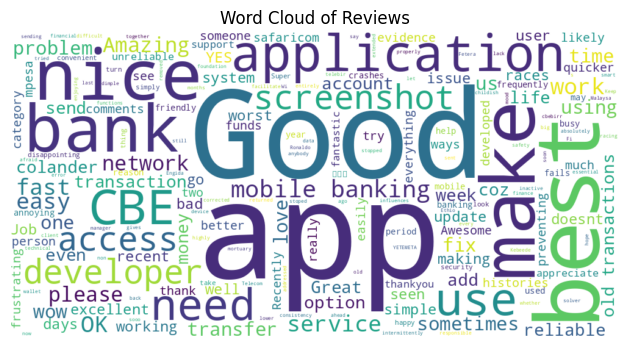

In [107]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


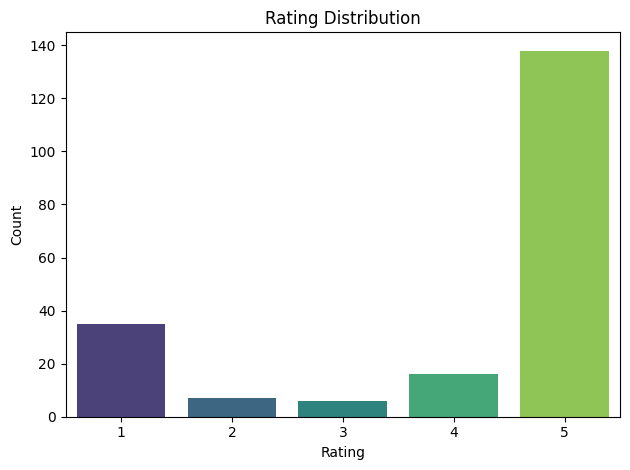

In [108]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


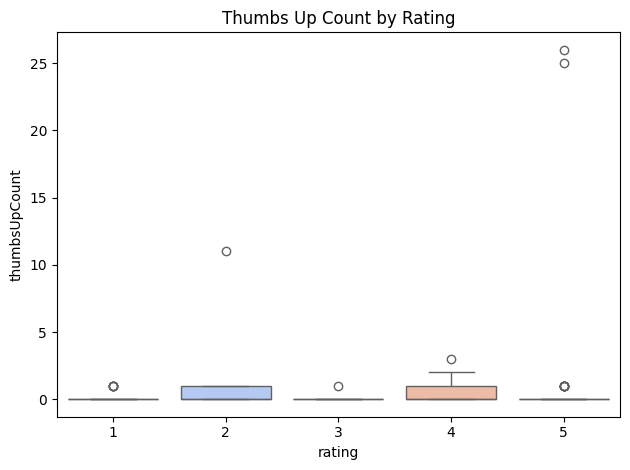

In [109]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


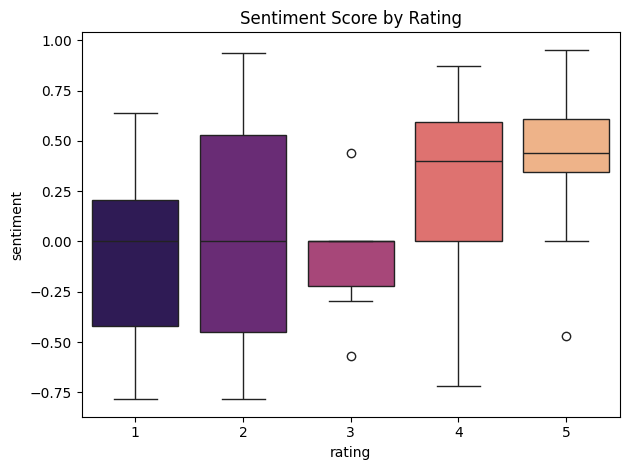

In [110]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [135]:
df.sample(15)

,review,rating,date,userName,thumbsUpCount,bank
1,YETEMETA,1,2025-06-03 21:04:44,Milky Yebassa,0,CBE
399,the Best,1,2025-04-26 11:51:19,Gazany Hhh,0,CBE
70,"Very good app,",5,2025-05-22 16:09:44,Mahmud Abdelqadr,1,CBE
127,The fastest transferring app I ever had its so...,5,2025-05-11 14:03:25,Yoba Bayo,0,CBE
113,excellent,5,2025-05-17 07:56:52,Tade Meko,0,CBE
165,nice,5,2025-05-03 12:54:17,FASIL KASSA MITIKU,0,CBE
47,excellent,5,2025-05-24 04:51:52,Yitagesu Haile,0,CBE
114,always disappointing ! especially the iOS one ...,1,2025-05-17 05:00:16,Muhammed Sirage,1,CBE
31,best,5,2025-05-25 17:34:23,Sadiik Abdo,0,CBE
108,very good,4,2025-05-17 21:10:29,Zi Gt,0,CBE
